# 2019/11/25 - 2019/12/02
## Gradient Descent Implement by Luo
### 1. Gradient Descent
### 2. AdaGrad
### 3. Stochastic Gradient Descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Fit the regression
$ y = x_1 + x_2 + 0.6 + \varepsilon  \ \ where \ \varepsilon\ \sim \ N(0, 0.03)$

In [2]:
x = np.random.randn(200, 2)

In [3]:
noises = np.random.normal(0, 0.03, 200)
y = x[:, 0] + x[:, 1] + 0.6 + noises

Text(0.5, 0, 'y')

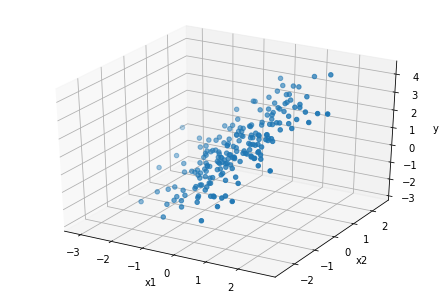

In [4]:
# %matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

### Mean Square Error

In [5]:
def mse_loss(y_hat, y):
    return np.sum((y_hat - y) ** 2, axis=0) / y.shape[0]

### Gradient Descent

In [6]:
def train_by_gradient_descent(x, y, w, b, loss_fn, lr, loss=5):
    loss_historys = []
    while loss > 0.01:
        y_hat = (x @ w + b).reshape(y.shape)  
        loss = loss_fn(y_hat, y)
        w_gradient = -2 / y.shape[0] * (x.T @ (y - y_hat)).reshape(w.shape)
        b_gradient = -2 / y.shape[0] * np.sum((y - y_hat), axis=0)
        w = w - lr * w_gradient
        b = b - lr * b_gradient
        loss_historys.append(loss)
    print('trained weight: ', w)
    print('trained intercept: ', b)
    print('loss: ', loss)
    plt.plot(np.arange(len(loss_historys)), loss_historys)
    plt.xlabel('iterations')
    plt.ylabel('loss')
    return (w, b)

trained weight:  [[0.93538784]
 [0.93499717]]
trained intercept:  [0.62602818]
loss:  0.009998379067494923


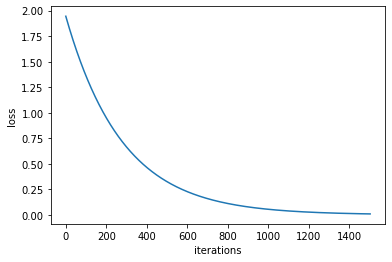

In [7]:
w = np.zeros((2, 1))
b=np.ones((1))
train_w, train_b = train_by_gradient_descent(
    x, y, w, b, loss_fn=mse_loss, lr=0.001)

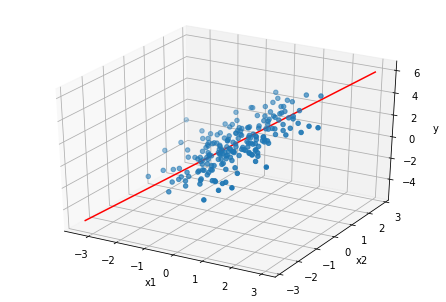

In [8]:
# %matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], y)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
x1_vals = np.array(ax.get_xlim())
x2_vals = np.array(ax.get_ylim())
y_vals = train_b + x1_vals * train_w[0] + x2_vals * train_w[1] 
ax.plot(x1_vals, x2_vals, y_vals, c='r')

### AdaGrad

In [9]:
def train_by_adagrad(x, y, w, b, loss_fn, lr, loss=5):
    loss_historys = []
    w_gradient_historys = []
    b_gradient_historys = []
    while loss > 0.01:
        y_hat = (x @ w + b).reshape(y.shape)  
        loss = loss_fn(y_hat, y)
        w_gradient = -2 / y.shape[0] * (x.T @ (y - y_hat)).reshape(w.shape)
        b_gradient = -2 / y.shape[0] * np.sum((y - y_hat), axis=0)
        w_gradient_historys.append(w_gradient ** 2)
        b_gradient_historys.append(b_gradient ** 2)
        w_variances = (np.array(w_gradient_historys).sum(axis=0)) ** 0.5
        b_variances = (np.array(b_gradient_historys).sum(axis=0)) ** 0.5
        w = w - lr * w_gradient / w_variances
        b = b - lr * b_gradient / b_variances
        loss_historys.append(loss)
    print('trained weight: ', w)
    print('trained intercept: ', b)
    print('loss: ', loss)
    plt.plot(np.arange(len(loss_historys)), loss_historys)
    plt.xlabel('iterations')
    plt.ylabel('loss')
    
    return (w, b)

trained weight:  [[0.93081988]
 [0.93491891]]
trained intercept:  [0.60296851]
loss:  0.0099978008650583


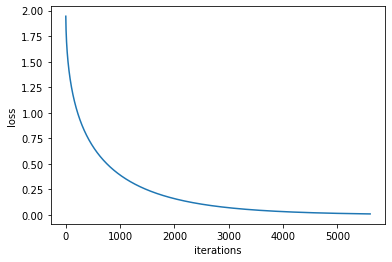

In [10]:
w = np.zeros((2, 1))
b = np.ones((1))
train_w, train_b = train_by_adagrad(
    x, y, w, b, loss_fn=mse_loss, lr=0.01)

### Stochastic Gradient Descent

In [11]:
def train_by_stochastic_gradient_descent(x, y, w, b, loss_fn, lr=0.01, epochs=500):
    loss_historys = []
    for epoch in range(epochs):
        orders = np.random.permutation(len(y))
        y_hat = (x @ w + b).reshape(y.shape)
        loss = mse_loss(y_hat, y)
        for i in orders:
            y_hat = x[i] @ w + b
            w_gradient = -2 * (x[i] * (y[i] - y_hat)).reshape(w.shape)
            b_gradient = -2 * (y[i] - y_hat)
            w = w - lr * w_gradient
            b = b - lr * b_gradient
        loss_historys.append(loss)
    print('trained weight: ', w)
    print('trained intercept: ', b)
    print('loss: ', loss)
    plt.plot(np.arange(len(loss_historys)), loss_historys)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    return (w, b)

trained weight:  [[1.00317322]
 [0.9997055 ]]
trained intercept:  [0.59722798]
loss:  0.0010549235922123733


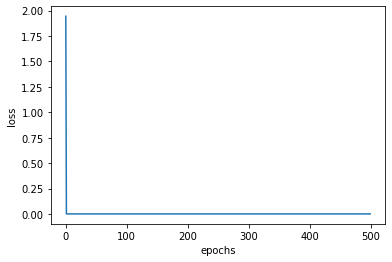

In [12]:
w = np.zeros((2, 1))
b = np.ones((1))
train_w, train_b = train_by_stochastic_gradient_descent(
    x, y, w, b, loss_fn=mse_loss, lr=0.01)